In [1]:
# tutorial http://pythonvision.org/basic-tutorial/

In [2]:
import numpy as np
import pylab
import mahotas as mh

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
dna = mh.imread('dna.jpeg')

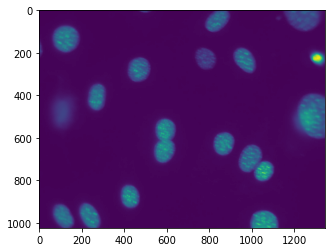

In [5]:
pylab.imshow(dna)
pylab.show()

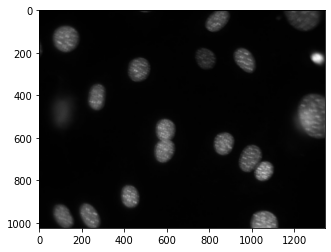

In [6]:
pylab.imshow(dna)
pylab.gray()
pylab.show()

In [7]:
print (dna.shape)
print (dna.dtype)
print (dna.max())
print (dna.min())

(1024, 1344)
uint8
252
0


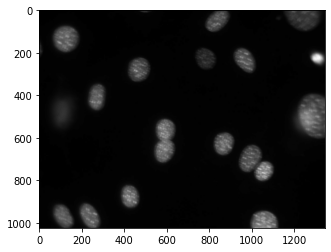

In [8]:
pylab.imshow(dna // 2)
pylab.show()

# Some Actual Work

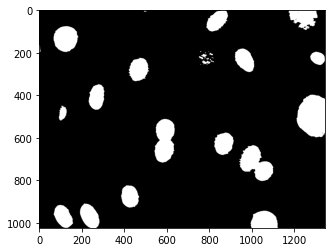

In [9]:
T = mh.thresholding.otsu(dna)
pylab.imshow(dna > T)
pylab.show()

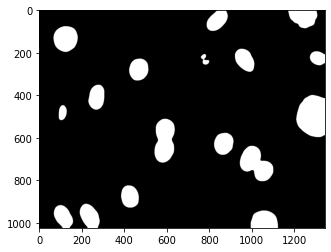

In [10]:
dnaf = mh.gaussian_filter(dna, 8)
dnaf = dnaf.astype('uint8')
T = mh.thresholding.otsu(dnaf)
pylab.imshow(dnaf > T)
pylab.show()

18


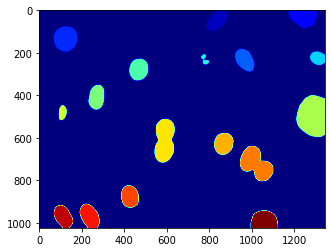

In [11]:
labeled,nr_objects = mh.label(dnaf > T)
print (nr_objects)
pylab.imshow(labeled)
pylab.jet()
pylab.show()

# Second Task: Segmenting the Image

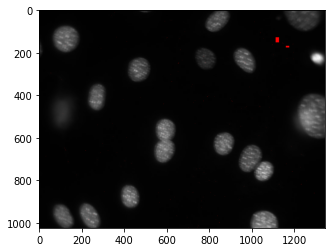

In [12]:
dnaf = mh.gaussian_filter(dna, 8)
rmax = mh.regmax(dnaf)
pylab.imshow(mh.overlay(dna, rmax))
pylab.show()

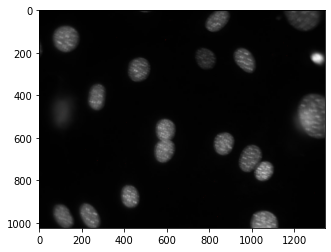

In [13]:
dnaf = mh.gaussian_filter(dna, 16)
rmax = mh.regmax(dnaf)
pylab.imshow(mh.overlay(dna, rmax))

In [14]:
seeds,nr_nuclei = mh.label(rmax)
print (nr_nuclei)

53


# Watershed

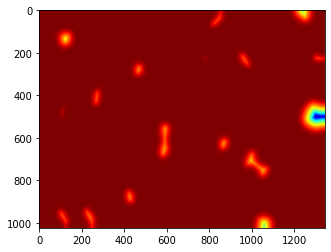

In [17]:
dnaf = dnaf.astype('uint8')
T = mh.thresholding.otsu(dnaf)
dist = mh.distance(dnaf > T)
dist = dist.max() - dist
dist -= dist.min()
dist = dist/float(dist.ptp()) * 255
dist = dist.astype(np.uint8)
pylab.imshow(dist)
pylab.show()

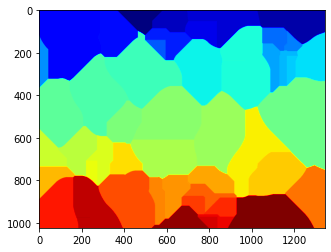

In [18]:
nuclei = mh.cwatershed(dist, seeds)
pylab.imshow(nuclei)
pylab.show()

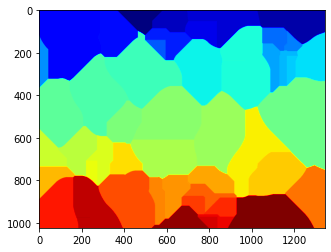

In [19]:
whole = mh.segmentation.gvoronoi(nuclei)
pylab.imshow(whole)
pylab.show()